# Classification Assignment



You are required to build a classification model using the below dataset on online payments to determine if a payment Is Fraudulent or not:

https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset

Requirements:

- Divide dataset after importing into Train/Cross Validation/Test

- Test various hypothesis with different degrees and optimize your model and parameters using cross validation & test sets as explained in the lecture

- Apply K-Fold & Stratified Sampling techniques

- Apply Regularization and optimize the value of its parameter

Column Info: 
- step: represents a unit of time where 1 step equals 1 hour
- type: type of online transaction
- amount: the amount of the transaction
- nameOrig: customer starting the transaction
- oldbalanceOrg: balance before the transaction
- newbalanceOrig: balance after the transaction
- nameDest: recipient of the transaction
- oldbalanceDest: initial balance of recipient before the transaction
- newbalanceDest: the new balance of recipient after the transaction
- isFraud: fraud transaction

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv("online_payment.csv")
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


### Categorical encoding

In [7]:
df = data.copy()
df = pd.get_dummies(data['type'],drop_first=True)
df = pd.concat([data,df],axis=1)

In [8]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,1,0,0,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,1,0,0,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,1


## Counts for each type

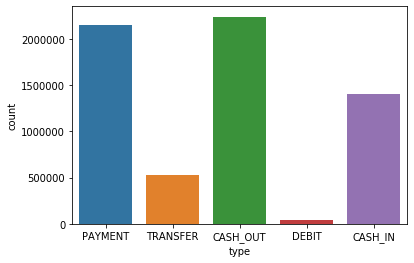

In [5]:
sns.countplot(x='type',data=df)

## How many Fraud and not Fraud

In [13]:
print('NUmber of Fraud transactions: \n {}'.format(df['isFraud'].value_counts()))

NUmber of Fraud transactions: 
 0    6354407
1       8213
Name: isFraud, dtype: int64


## Sigmoid function

In [20]:
def sigmoid(arr_in):
    arr = []
    for item in arr_in:
        arr.append(1/(1+math.exp(-item)))
    return arr

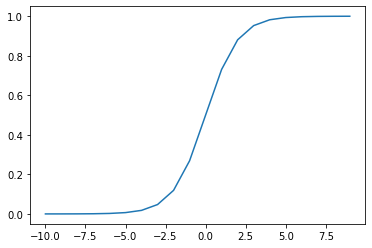

In [21]:
C = np.arange(-10, 10)
sig = sigmoid(C)
plt.plot(C,sig)

plt.show()

## Preparing for split for Payment and amount (predictors) Vs 'isFraud' (target)

In [30]:
x = df[['PAYMENT', 'amount']]
y = df['isFraud']

### Normalizing the new dataset

In [31]:
# Normalizing data
for column in x.columns:
    x[column] = x[column]  / x[column].abs().max()
      
x.head()

,PAYMENT,amount
0,1.0,0.000106
1,1.0,0.000020
2,0.0,0.000002
3,0.0,0.000002
4,1.0,0.000126


### Sigmoid function against 'Payment' and amount

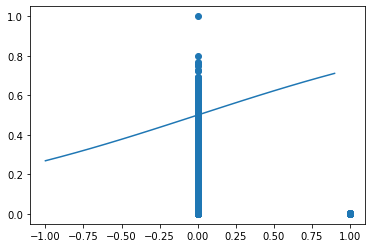

In [32]:
C = np.arange(-1., 1., 0.1)
sig = sigmoid(C)
plt.plot(C,sig)
plt.scatter(x["PAYMENT"], x["amount"])

plt.show()

### Training the model

In [33]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x, y, train_size=0.6, random_state=1)


In [34]:
X_train_1.head()

,PAYMENT,amount
3157759,0.0,0.000036
6321242,0.0,0.002378
873795,0.0,0.001522
5008344,0.0,0.000817
179299,0.0,0.001998


### Scatter plot of Cashout and amount

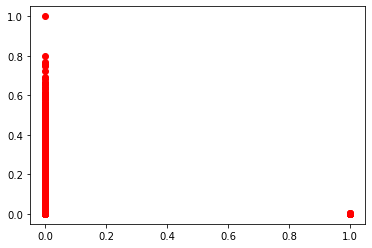

In [40]:
plt.scatter(X_train_1["PAYMENT"],X_train_1["amount"], color='red') 


### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lr_1 = LogisticRegression()
lr_1.fit(X_train_1,y_train_1)

LogisticRegression()

### Predicting Values

In [41]:
pred_lr_1 = lr_1.predict(X_test_1)

### Classification report

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test_1,pred_lr_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2541768
           1       0.00      0.00      0.00      3280

    accuracy                           1.00   2545048
   macro avg       0.50      0.50      0.50   2545048
weighted avg       1.00      1.00      1.00   2545048



### Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix  
cm_1= confusion_matrix(y_test_1,pred_lr_1)  
cm_1

array([[2541738,      30],
       [   3280,       0]], dtype=int64)

### Accuracy For predicted values vs test values

In [44]:
from sklearn.metrics import accuracy_score
print ("Accuracy DF_1: ", accuracy_score(y_test_1, pred_lr_1))

Accuracy DF_1:  0.9986994351383549


### Plotting the Descision boundary and identifiying classes

In [45]:
#x = x.iloc[:, [ 2,11]].values
#x 
x = x.iloc[:, :].values

# output
y = data.iloc[:, 9].values

In [46]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
        x, y, train_size = 0.6, random_state = 0)

In [47]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

In [48]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [49]:
y_pred = classifier.predict(xtest)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


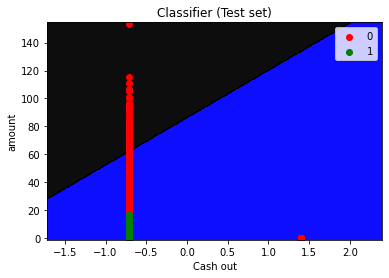

In [50]:
from matplotlib.colors import ListedColormap
X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                               stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(
             np.array([X1.ravel(), X2.ravel()]).T).reshape(
             X1.shape), alpha = 0.95, cmap = ListedColormap(('blue', 'black')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
     
plt.title('Classifier (Test set)')
plt.xlabel('Cash out')
plt.ylabel('amount')
plt.legend()
plt.show()

Text(0.5, 33.0, 'Predicted Values')

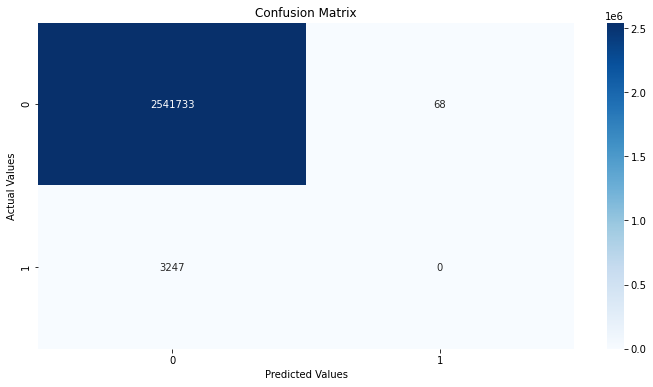

In [51]:
cm=confusion_matrix(ytest,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")


### Splitting the types to 4 indivial data sets (as done above)

### (CASHOUT, amount), (DEBIT, amount), (PAYMENT, amount), (TRANSFER, amount)

In [52]:
x = df[['CASH_OUT', 'amount']]
X_2 = df[['DEBIT', 'amount']]
X_3 = df[['PAYMENT','amount']]
X_4 = df[['TRANSFER', 'amount']] 
y = df['isFraud']

### Training the four models

In [53]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x, y, train_size=0.6, random_state=1)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, train_size=0.6, random_state=1)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y, train_size=0.6, random_state=1)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y, train_size=0.6, random_state=1)

### Implementing 4 logistic regression models

In [54]:
from sklearn.linear_model import LogisticRegression
lr_1 = LogisticRegression()
lr_1.fit(X_train_1,y_train_1)

lr_2 = LogisticRegression()
lr_2.fit(X_train_2,y_train_2)

lr_3 = LogisticRegression()
lr_3.fit(X_train_3,y_train_3)

lr_4 = LogisticRegression()
lr_4.fit(X_train_4,y_train_4)

LogisticRegression()

### predicting values

In [55]:
pred_lr_1 = lr_1.predict(X_test_1)
pred_lr_2 = lr_2.predict(X_test_2)
pred_lr_3 = lr_3.predict(X_test_3)
pred_lr_4 = lr_4.predict(X_test_4)


In [56]:
from sklearn.metrics import classification_report
print( "DF_1 ", classification_report(y_test_1,pred_lr_1))
print("DF_2 ", classification_report(y_test_2,pred_lr_2))
print("DF_3 ", classification_report(y_test_3,pred_lr_3))
print("DF_4 " , classification_report(y_test_4,pred_lr_4))

DF_1                precision    recall  f1-score   support

           0       1.00      1.00      1.00   2541768
           1       0.00      0.00      0.00      3280

    accuracy                           1.00   2545048
   macro avg       0.50      0.50      0.50   2545048
weighted avg       1.00      1.00      1.00   2545048

DF_2                precision    recall  f1-score   support

           0       1.00      1.00      1.00   2541768
           1       0.00      0.00      0.00      3280

    accuracy                           1.00   2545048
   macro avg       0.50      0.50      0.50   2545048
weighted avg       1.00      1.00      1.00   2545048

DF_3                precision    recall  f1-score   support

           0       1.00      1.00      1.00   2541768
           1       0.00      0.00      0.00      3280

    accuracy                           1.00   2545048
   macro avg       0.50      0.50      0.50   2545048
weighted avg       1.00      1.00      1.00   2545048

D

### Confusion matrices

In [33]:
from sklearn.metrics import confusion_matrix  
cm_1= confusion_matrix(y_test_1,pred_lr_1)  
cm_2= confusion_matrix(y_test_2,pred_lr_2)  
cm_3= confusion_matrix(y_test_3,pred_lr_3)  
cm_4= confusion_matrix(y_test_4,pred_lr_4)  


In [37]:
print("Confusion matrix for dataset 1")
cm_1

Confusion matrix for dataset 1


array([[2541768,       0],
       [   3280,       0]], dtype=int64)

In [38]:
print("Confusion matrix for dataset 2")

cm_2

Confusion matrix for dataset 2


array([[2541768,       0],
       [   3280,       0]], dtype=int64)

In [39]:
print("Confusion matrix for dataset 3")

cm_3

Confusion matrix for dataset 3


array([[2541724,      44],
       [   3280,       0]], dtype=int64)

In [40]:
print("Confusion matrix for dataset 4")

cm_4

Confusion matrix for dataset 4


array([[2541768,       0],
       [   3280,       0]], dtype=int64)

### Accuracy

In [41]:
from sklearn.metrics import accuracy_score
print ("Accuracy DF_1: ", accuracy_score(y_test_1, pred_lr_1))
print ("Accuracy DF_2: ", accuracy_score(y_test_2, pred_lr_2))
print ("Accuracy DF_3: ", accuracy_score(y_test_3, pred_lr_3))
print ("Accuracy DF_4: ", accuracy_score(y_test_4, pred_lr_4))


Accuracy DF_1:  0.9987112227352883
Accuracy DF_2:  0.9987112227352883
Accuracy DF_3:  0.998693934259786
Accuracy DF_4:  0.9987112227352883


# Classification for the whole dataset

In [42]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [43]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


### Predictor and target

In [45]:
X = df[['step','CASH_OUT','DEBIT','PAYMENT',
              'TRANSFER','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud']]
y = df['isFraud']

In [46]:
X.head()

,step,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,0,0,1,0,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,0,0,1,0,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,0,0,0,1,181.00,181.0,0.00,0.0,0.0,0
3,1,1,0,0,0,181.00,181.0,0.00,21182.0,0.0,0
4,1,0,0,1,0,11668.14,41554.0,29885.86,0.0,0.0,0


### training data

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)


### logistic regression and predicitng values

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

In [50]:
pred_lr = lr.predict(X_test)


### Classification report and Confusion matrix

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_lr))
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,pred_lr)  
cm

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2541782
           1       0.38      0.45      0.41      3266

    accuracy                           1.00   2545048
   macro avg       0.69      0.72      0.70   2545048
weighted avg       1.00      1.00      1.00   2545048



array([[2539361,    2421],
       [   1805,    1461]], dtype=int64)

Text(0.5, 33.0, 'Predicted Values')

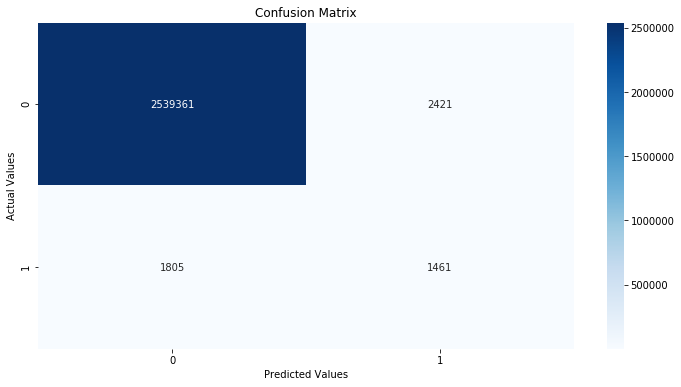

In [52]:
cm= confusion_matrix(y_test,pred_lr)  
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")


### Accuracy

In [55]:
print ("Accuracy: ", accuracy_score(y_test, pred_lr))


Accuracy:  0.9983395205119904


### Scaling objects

In [58]:
columns = X_train.columns
scalerx = StandardScaler()
X_train_scaled = scalerx.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = columns)

X_test_scaled = scalerx.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = columns)

In [59]:
X_train_scaled.head()

,step,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,-1.400939,1.357785,-0.080986,-0.714753,-0.302406,-0.252516,-0.287132,-0.292577,-0.323187,-0.325088,-0.001354
1,0.622731,1.357785,-0.080986,-0.714753,-0.302406,-0.111130,-0.288614,-0.292577,0.087293,0.077926,-0.001354
2,-1.429046,-0.736494,-0.080986,1.399085,-0.302406,-0.289174,-0.288879,-0.292577,-0.323187,-0.332975,-0.001354
3,-0.234518,-0.736494,-0.080986,-0.714753,3.306809,0.336895,-0.209329,-0.292577,-0.286625,-0.195548,-0.001354
4,1.086489,-0.736494,-0.080986,1.399085,-0.302406,-0.254441,-0.132543,-0.147674,-0.323187,-0.332975,-0.001354


### PCA

In [61]:
from sklearn.decomposition import IncrementalPCA

pca = IncrementalPCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)
print(X_train_pca)

[[-0.24749253 -0.01301224]
 [ 0.2997949   0.00272774]
 [-1.23847038  0.0073291 ]
 ...
 [-0.10930334  0.0018096 ]
 [-0.09110519  0.00300268]
 [-0.1644498  -0.0074385 ]]


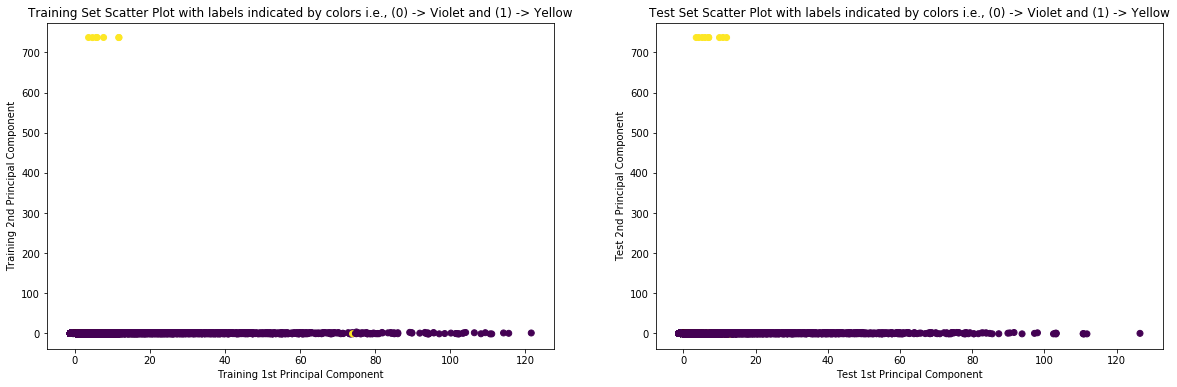

In [62]:
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train)
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Training Set Scatter Plot with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c = y_test)
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Test Set Scatter Plot with labels indicated by colors i.e., (0) -> Violet and (1) -> Yellow')
plt.show()

### 5-Fold Grid-Search Cross Validation on Logistic Regression

In [64]:
# 5-Fold Grid-Search Cross Validation on Logistic Regression Classifier for tuning the hyper-parameter, C with Accuracy scoring
from sklearn.model_selection import GridSearchCV

params = {'C':[0.01, 0.1, 1, 10, 100]}

clf = LogisticRegression()

folds = 5
model_cv = GridSearchCV(estimator = clf, 
                        param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 3)

model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ........C=0.01;, score=(train=0.999, test=0.999) total time=   7.9s
[CV 2/5] END ........C=0.01;, score=(train=0.999, test=0.999) total time=   6.3s
[CV 3/5] END ........C=0.01;, score=(train=0.999, test=0.999) total time=   5.9s
[CV 4/5] END ........C=0.01;, score=(train=0.999, test=0.999) total time=   5.7s
[CV 5/5] END ........C=0.01;, score=(train=0.999, test=0.999) total time=   5.7s
[CV 1/5] END .........C=0.1;, score=(train=0.999, test=0.999) total time=   6.3s
[CV 2/5] END .........C=0.1;, score=(train=0.999, test=0.999) total time=   6.2s
[CV 3/5] END .........C=0.1;, score=(train=0.999, test=0.999) total time=   6.5s
[CV 4/5] END .........C=0.1;, score=(train=0.999, test=0.999) total time=   6.1s
[CV 5/5] END .........C=0.1;, score=(train=0.999, test=0.999) total time=   6.0s
[CV 1/5] END ...........C=1;, score=(train=0.999, test=0.999) total time=   7.7s
[CV 2/5] END ...........C=1;, score=(train=0.999,

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, return_train_score=True,
             scoring='accuracy', verbose=3)

### Best hyper- parameter

In [65]:
# getting the best hyper-parameter
print(model_cv.best_params_)


{'C': 0.01}


### re-training the Logistic Regression Classifier with the best hyper-parameter

In [66]:
# re-training the Logistic Regression Classifier with the best hyper-parameter, C = 10
model = LogisticRegression(C = 10).fit(X_train_pca, y_train)

### Train and test prediction

In [67]:
y_train_pred = model.predict(X_train_pca)

y_test_pred = model.predict(X_test_pca)

### Accuracy

In [69]:
from sklearn import metrics

# Getting the Training and Test Accuracy of the Logistic Regression Model
print('Training Accuracy of the Model: ', metrics.accuracy_score(y_train, y_train_pred))
print('Test Accuracy of the Model: ', metrics.accuracy_score(y_test, y_test_pred))
print()

# Getting the Training and Test Precision of the Logistic Regression Model
print('Training Precision of the Model: ', metrics.precision_score(y_train, y_train_pred))
print('Test Precision of the Model: ', metrics.precision_score(y_test, y_test_pred))
print()

# Getting the Training and Test Recall of the Logistic Regression Model
print('Training Recall of the Model: ', metrics.recall_score(y_train, y_train_pred))
print('Test Recall of the Model: ', metrics.recall_score(y_test, y_test_pred))
print()

# Getting the Training and Test F1-Score of the Logistic Regression Model
print('Training F1-Score of the Model: ', metrics.f1_score(y_train, y_train_pred))
print('Test F1-Score of the Model: ', metrics.f1_score(y_test, y_test_pred))
print()

Training Accuracy of the Model:  0.9986766457842838
Test Accuracy of the Model:  0.9986793962235683

Training Precision of the Model:  0.058823529411764705
Test Precision of the Model:  0.07964601769911504

Training Recall of the Model:  0.0014149989892864362
Test Recall of the Model:  0.0027556644213104714

Training F1-Score of the Model:  0.0027635215159889457
Test F1-Score of the Model:  0.005327019828351583



### Plotting

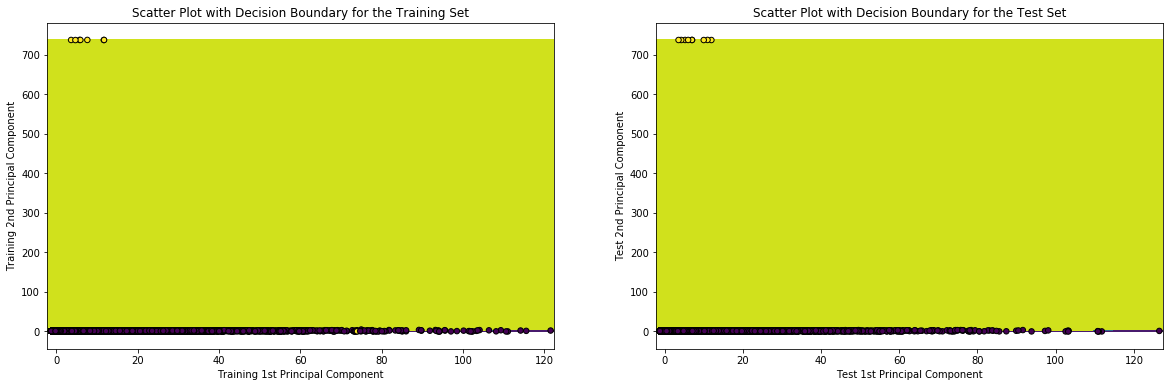

In [70]:
# plotting the decision boundary in the scatter plot of Training and Test Set with labels indicated by colors
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = model.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)


x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
                               np.arange(y_min, y_max, 0.1))

Z_test = model.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)



plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_train, s = 30, edgecolor = 'k')
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Training Set')
plt.subplot(1, 2, 2)
plt.contourf(xx_test, yy_test, Z_test)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c = y_test, s = 30, edgecolor = 'k')
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.show()

In [71]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [72]:
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets

In [73]:
# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(X_train)
  
# Create  classifier object.
lr = linear_model.LogisticRegression()
  
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(X_train, y_train):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))

    
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.9991277196548599, 0.9991015250499007, 0.9991748677823852, 0.9992324960642502, 0.999132956304665, 0.9992036819233178, 0.9991879651191726, 0.99915915097824, 0.9991381952393801, 0.9991879651191726]

Maximum Accuracy That can be obtained from this model is: 99.92324960642503 %

Minimum Accuracy: 99.91015250499007 %

Overall Accuracy: 99.91646523235345 %

Standard Deviation is: 4.0001896760652124e-05
